# Project Proposal by Lan Tran (99071334)


## 1. Introduction

We are tasked with analyze heart disease data in 1 of 4 area (Cleveland, Hungarian, Switzerland and VA). Each dataframe is created to study the presence of heart disease in patient. The dataframe that I choose for further analysis is Cleveland. The data consists of 14 variables:
1. age
2. sex
3. cp
4. trestbps (resting blood pressure)
5. chol (serum cholestoral)
6. fbs (fasting blood sugar > 120 mg/dl)
7. restecg
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope
12. ca (number of major vessels(0-3) colored by flourosopy
13. thal
14. num (diagnosis of heart disease)

## 2.Initiate libraries 

We first need to load needed libraries for our project

In [ ]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(janitor)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

## 3.Reading the data

As I have chosen Cleveland, we will read and analyze the dataframe

In [30]:
heart_disease <- read_csv("data/heart_disease/processed.cleveland.data")
heart_disease

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## 3.Data Wrangling 

We can see that the data has some problems that we will need to wrangle to make it tidy data. The problems are:
* There are missing column names
* The variable type is wrong.

In [38]:
colnames(heart_disease) <- c('age', 'sex','cp','trestbps','chol', 'fbs','restecg','thalach','exang','oldpeak', 'slope', 'ca','thal', 'num')
heart_disease <- mutate(heart_disease, sex = as.factor(sex), num  = as.factor(num), cp = as.factor(cp))
heart_disease 


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Now, we have a clear view of the dataframe and the dataframe is nearly in tidy data format. However there are some cells of "ca" and "thal" that has unknown data, which would not be a problem as we don't need them and will de-select them in the next step 

## 4.Data splitting and further wrangling 

From the table above with some in depth consideration. I decided to do an analysis towards the topic of **predicting if a person has heart disease based on age and maximum heart rate achieve**.
By doing this, we will filter out irrelevant variables and make our dataset cleaner and satisfy tidy format. 
However, first we will need to split our data into 75% for training and 25% for testing for our future machine learning model. 

In [63]:
set.seed(5201)

heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,125,212,0,0,168,0,1.0,1,2.0,7.0,3
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


Next, we will filter out unnecessary variables as we only need **"age", "thalach" and "num"**. Morever, it would not be ideal to predict the heart rate type as there is no clear correlation. Therefor we will need to convert the "num" variable into a "TRUE/FALSE" factor variable to indicate if a person has heart disease or not. To do this, we will: 
1. Convert "num" into numeric form which will have a range from 1-5.
2. Minus 1 to decrease the range to 0-4.
3. "&" with 1, therefore 0 values will stay **FALSE** and the rest of the value will be **TRUE**
4. Convert the type from lgl back to factor for modelling purposes. 

In [86]:
set.seed(5201)

heart_disease_train_processed <- heart_disease_train |>
                                select(age, thalach, num) |>
                                mutate(has_disease = as.factor((as.numeric(num) - 1) & 1)) |>
                                select(-num)
heart_disease_train_processed

age,thalach,has_disease
<dbl>,<dbl>,<fct>
37,187,FALSE
41,172,FALSE
57,163,FALSE
⋮,⋮,⋮
52,168,TRUE
59,90,TRUE
57,115,TRUE


## 5. Visualize the data 

Next, we will make a scatterplot of maximum heart rate vs age with heart disease type as different colors. Here we could study if there are any relevant relationship in order to build a
machine learning model in the future. We also need to make sure the graph is human readable.

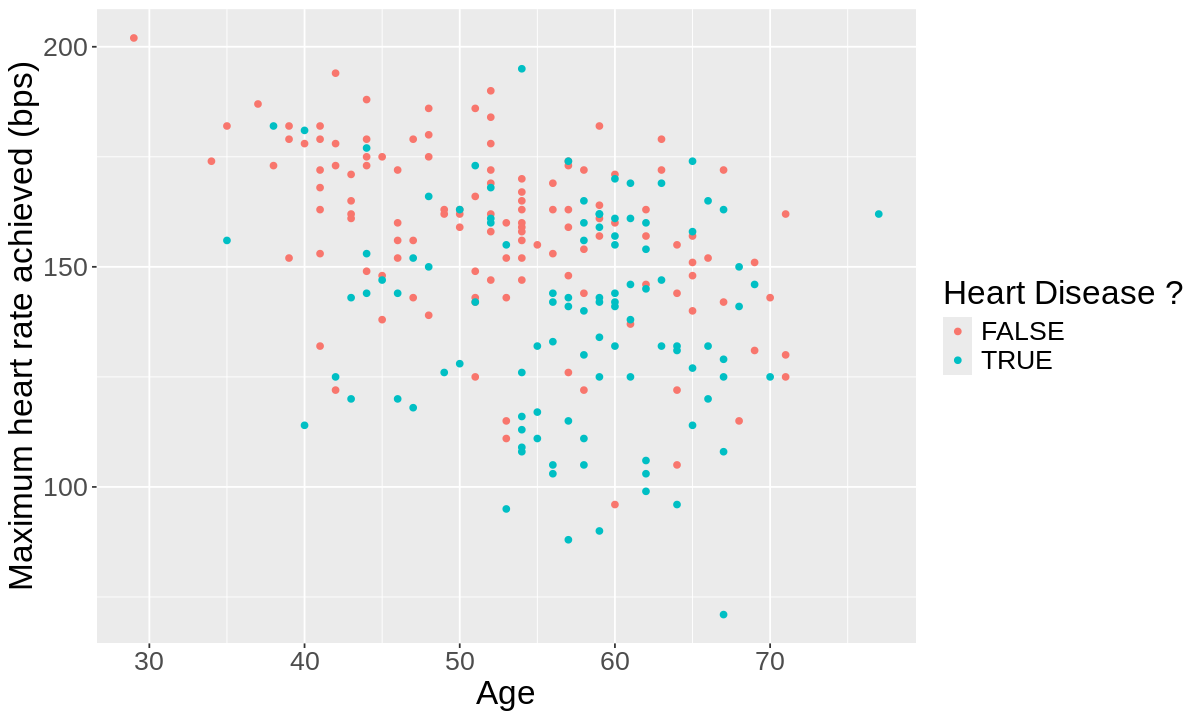

In [87]:
set.seed(5201)

options(repr.plot.width = 10, repr.plot.height = 6)

heart_disease_train_filtered_plot <- heart_disease_train_processed |>
                                    ggplot(aes(x = age, y = thalach, colour = has_disease)) +
                                        geom_point()+
                                        labs(x = "Age", y = "Maximum heart rate achieved (bps)", colour = "Heart Disease ?") +
                                        theme(text = element_text(size = 20))
heart_disease_train_filtered_plot 

**From the graph, we could see that people with higher age and with low maximum heart rate (below 150 bps) tends to have heart disease.**

## 6. Conclusion 
Overall, we have chosen to analyze the heart rate data of Cleveland and decided to build a model to help determine if a person will likely have a heart disease based on their **age and their maximum heart rate**. The steps that we did are that we have read the data, wrangle it to tidy format. We then split, analyze and visualize the training data to show the correlation between age and maximum heart rate and if a personal has the disease. People is likely to have heart disease when they are older with lower heart rate. This analysis could lead to future medical improvement that we could find patient that is likely to have heart rate disease for early treatment. 

## 7. Reference
1. DSCI 100 Online Ebook.
2. DSCI 100 Worksheets and Tutorials
3. DSCI 100 Recordings